The below code will sum up each column 

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filepath = 'https://raw.githubusercontent.com/JadenFaste/AHRIData/main/AHRI_no_YTD.csv'
df = pd.read_csv(filepath, parse_dates=['Date'], dayfirst=True)
column_sums = df.sum()
print(column_sums)

Gas Warm Air Furnaces                                   15680634
Oil Warm Air Furnaces                                     152181
Residential Gas Automatic Storage Water Heaters         19557521
Residential Electric Automatic Storage Water Heaters    19972172
Commercial Gas Storage Water Heaters                      373414
Commercial Electric Storage Water Heaters                 615970
Unitary_Air_Conditioning                                25191702
Unitary_Heat_Pump                                       16042753
Unitary_AC_HP_sub16.5                                    1672354
Unitary_AC_HP_16.5-21.9                                  3975548
Unitary_AC_HP_22.0-26.9                                  8118673
Unitary_AC_HP_27.0-32.9                                  6434067
Unitary_AC_HP_33.0-38.9                                  8675715
Unitary_AC_HP_39.0-43.9                                  3084644
Unitary_AC_HP_44.0-53.9                                  4523357
Unitary_AC_HP_54.0-64.9  

C:\Users\bober\AppData\Local\Temp\ipykernel_4412\4015132398.py:7: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  column_sums = df.sum()


The below code will format the csv file into a python-compatible date time, and generates a plot that will display the actual values for each category with a moving average of window size 3

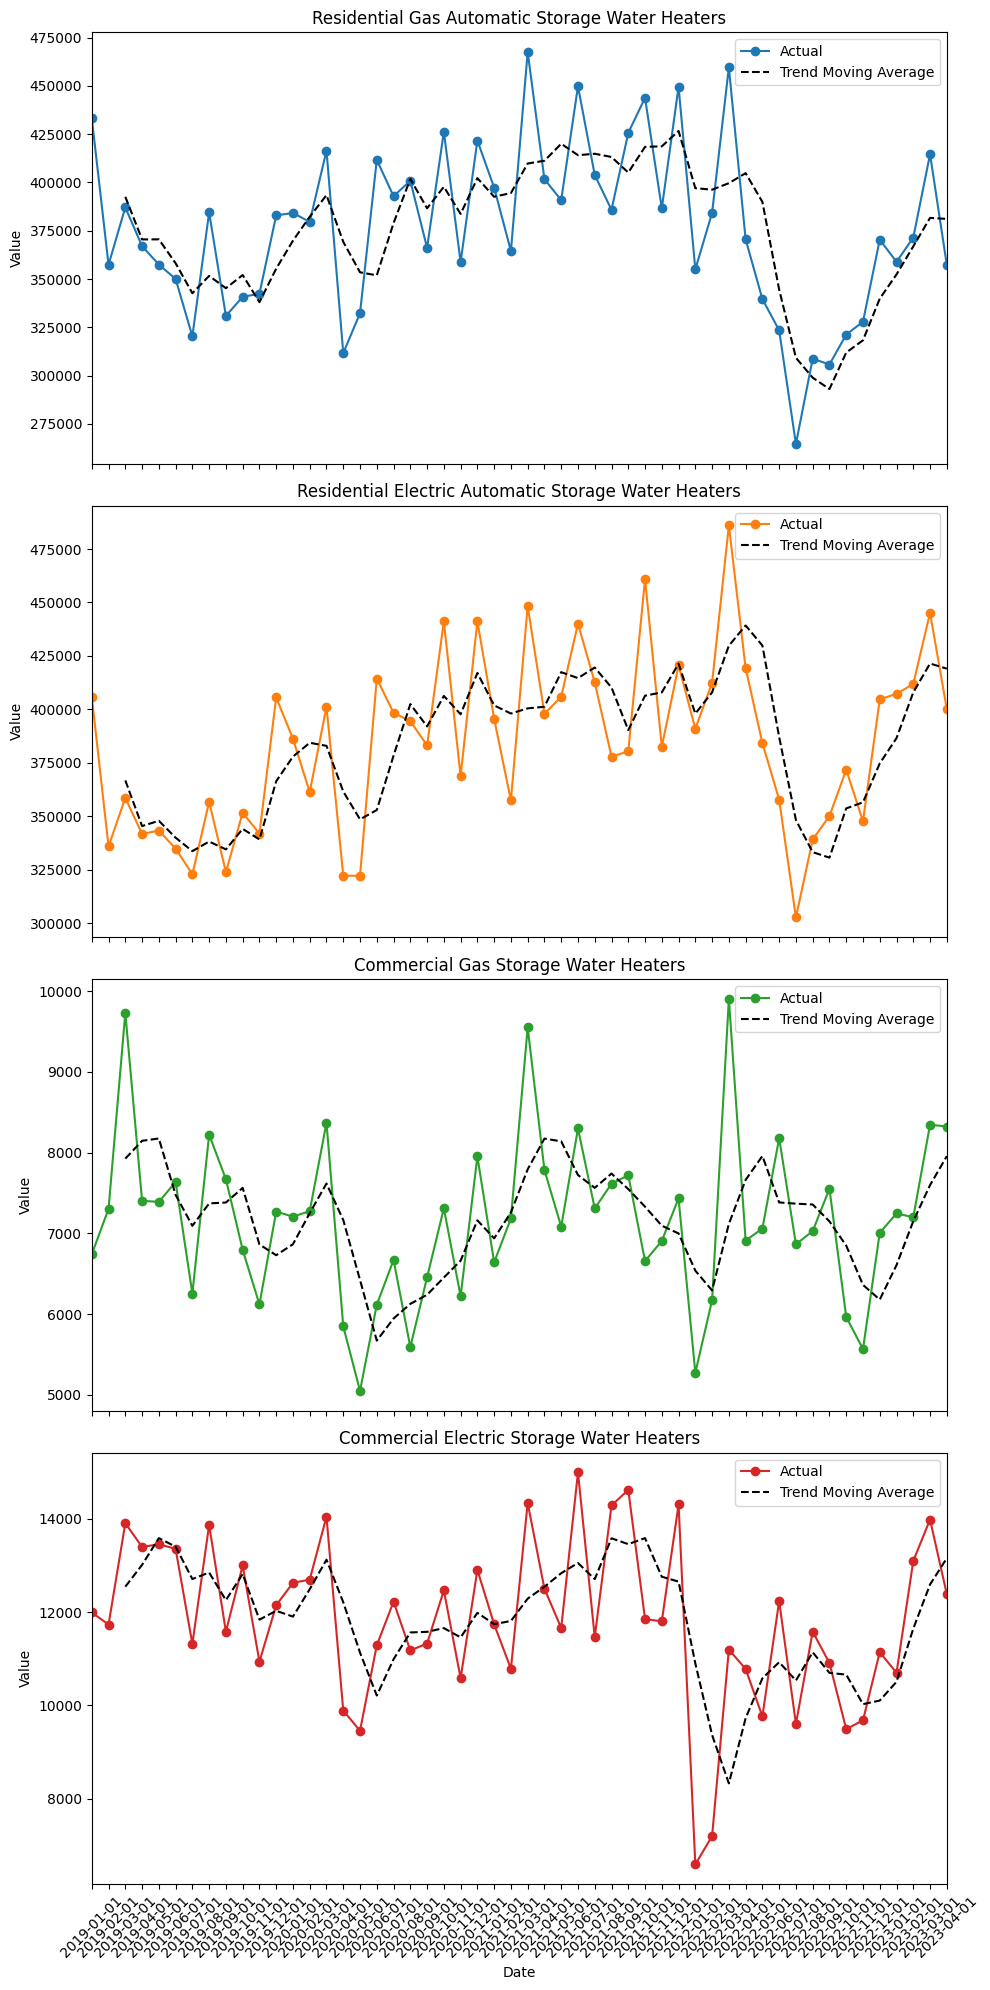

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filepath = 'https://raw.githubusercontent.com/JadenFaste/AHRIData/main/AHRI_no_YTD.csv'
df = pd.read_csv(filepath, parse_dates=['Date'])

#  format 'YYYY-MM-DD', let's use that format to parse them
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date', inplace=True)
window_size = 3

# Calculate the moving average for each column of interest
df_ma = df.rolling(window=window_size).mean()
# Create subplots for each category
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 20), sharex=True)

# Plotting each category with its moving average in the same subplot
categories = ['Residential Gas Automatic Storage Water Heaters', 'Residential Electric Automatic Storage Water Heaters', 'Commercial Gas Storage Water Heaters', 'Commercial Electric Storage Water Heaters']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

for i, category in enumerate(categories):
    # Plot actual values
    df[category].plot(ax=axes[i], color=colors[i], marker='o', linestyle='-', label='Actual')
    # Plot moving average
    df_ma[category].plot(ax=axes[i], color='black', linestyle='--', label='Trend Moving Average')

    axes[i].set_title(category)
    axes[i].set_ylabel('Value')
    axes[i].legend()

# Set common x-label
axes[-1].set_xlabel('Date')

# Rotate and format the date labels
plt.setp(axes, xticks=df.index, xticklabels=df.index.strftime('%Y-%m-%d'))
plt.xticks(rotation=45)

# Adjust layout to fit everything
plt.tight_layout()

# Display the plots
plt.show()

Below will generate a stacked barchart by each year and by residental and commercial

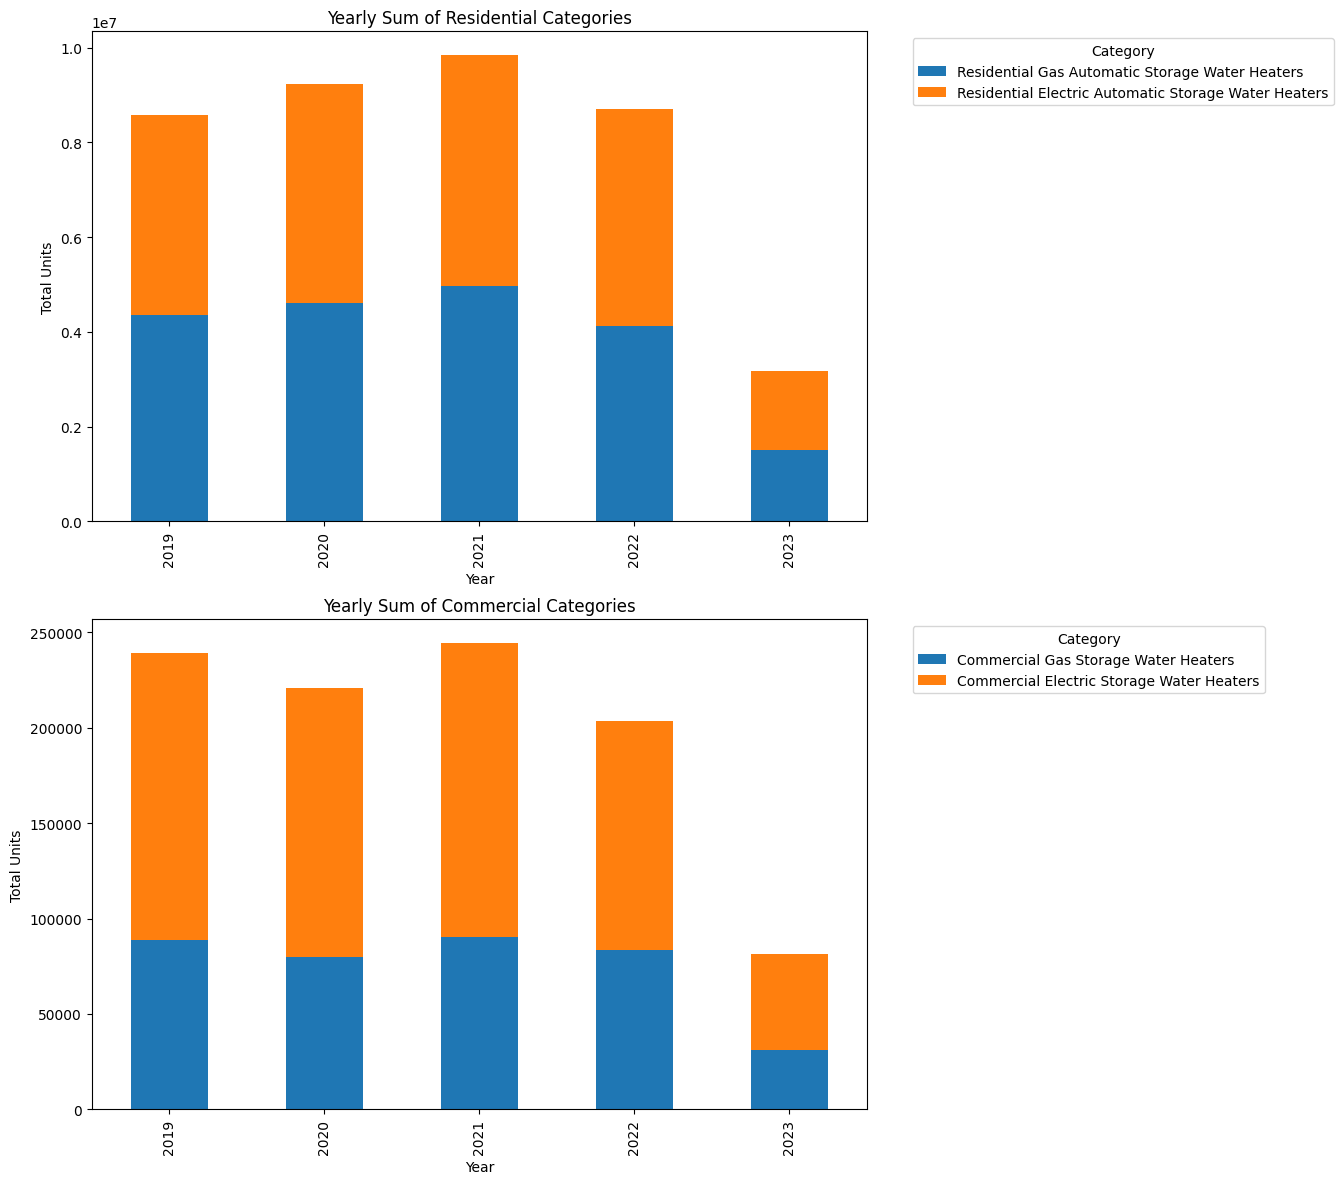

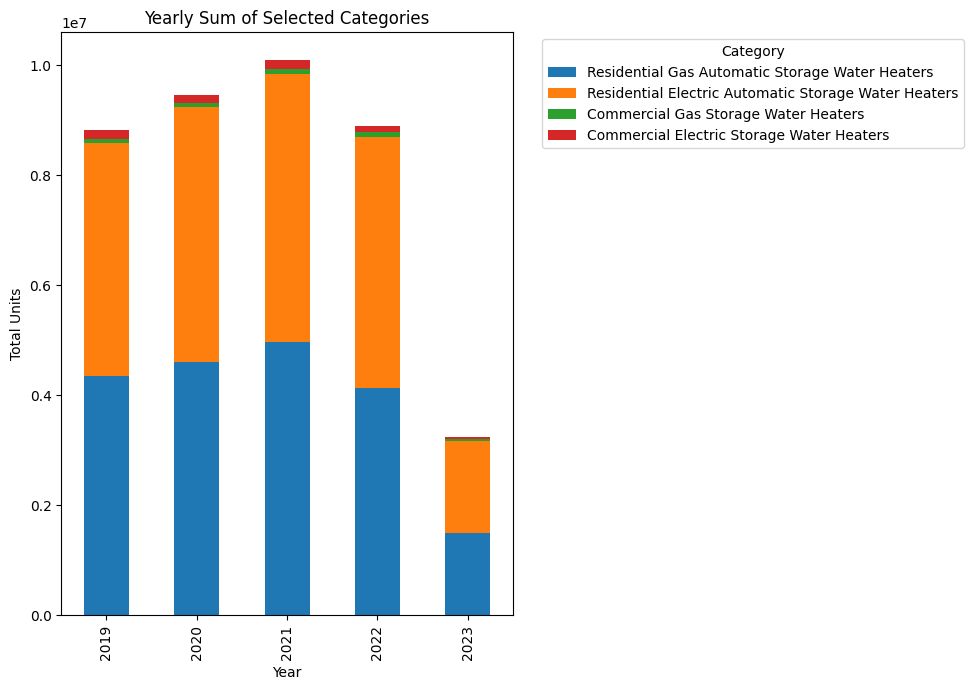

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(filepath)

df['Date'] = pd.to_datetime(df['Date'])

# Extract year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Sum up the values for each year for the specified categories
summed_data = df.groupby('Year')[['Residential Gas Automatic Storage Water Heaters', 
                                    'Residential Electric Automatic Storage Water Heaters', 
                                    'Commercial Gas Storage Water Heaters', 
                                    'Commercial Electric Storage Water Heaters']].sum()

residential_data = df.groupby('Year')[['Residential Gas Automatic Storage Water Heaters', 
                                         'Residential Electric Automatic Storage Water Heaters']].sum()

commercial_data = df.groupby('Year')[['Commercial Gas Storage Water Heaters', 
                                        'Commercial Electric Storage Water Heaters']].sum()

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(10, 14))
summed_data.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Yearly Sum of Selected Categories')
plt.ylabel('Total Units')
plt.xlabel('Year')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Residential Plot
residential_data.plot(kind='bar', stacked=True, ax=ax[0])
ax[0].set_title('Yearly Sum of Residential Categories')
ax[0].set_ylabel('Total Units')
ax[0].set_xlabel('Year')
ax[0].legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Commercial Plot
commercial_data.plot(kind='bar', stacked=True, ax=ax[1])
ax[1].set_title('Yearly Sum of Commercial Categories')
ax[1].set_ylabel('Total Units')
ax[1].set_xlabel('Year')
ax[1].legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

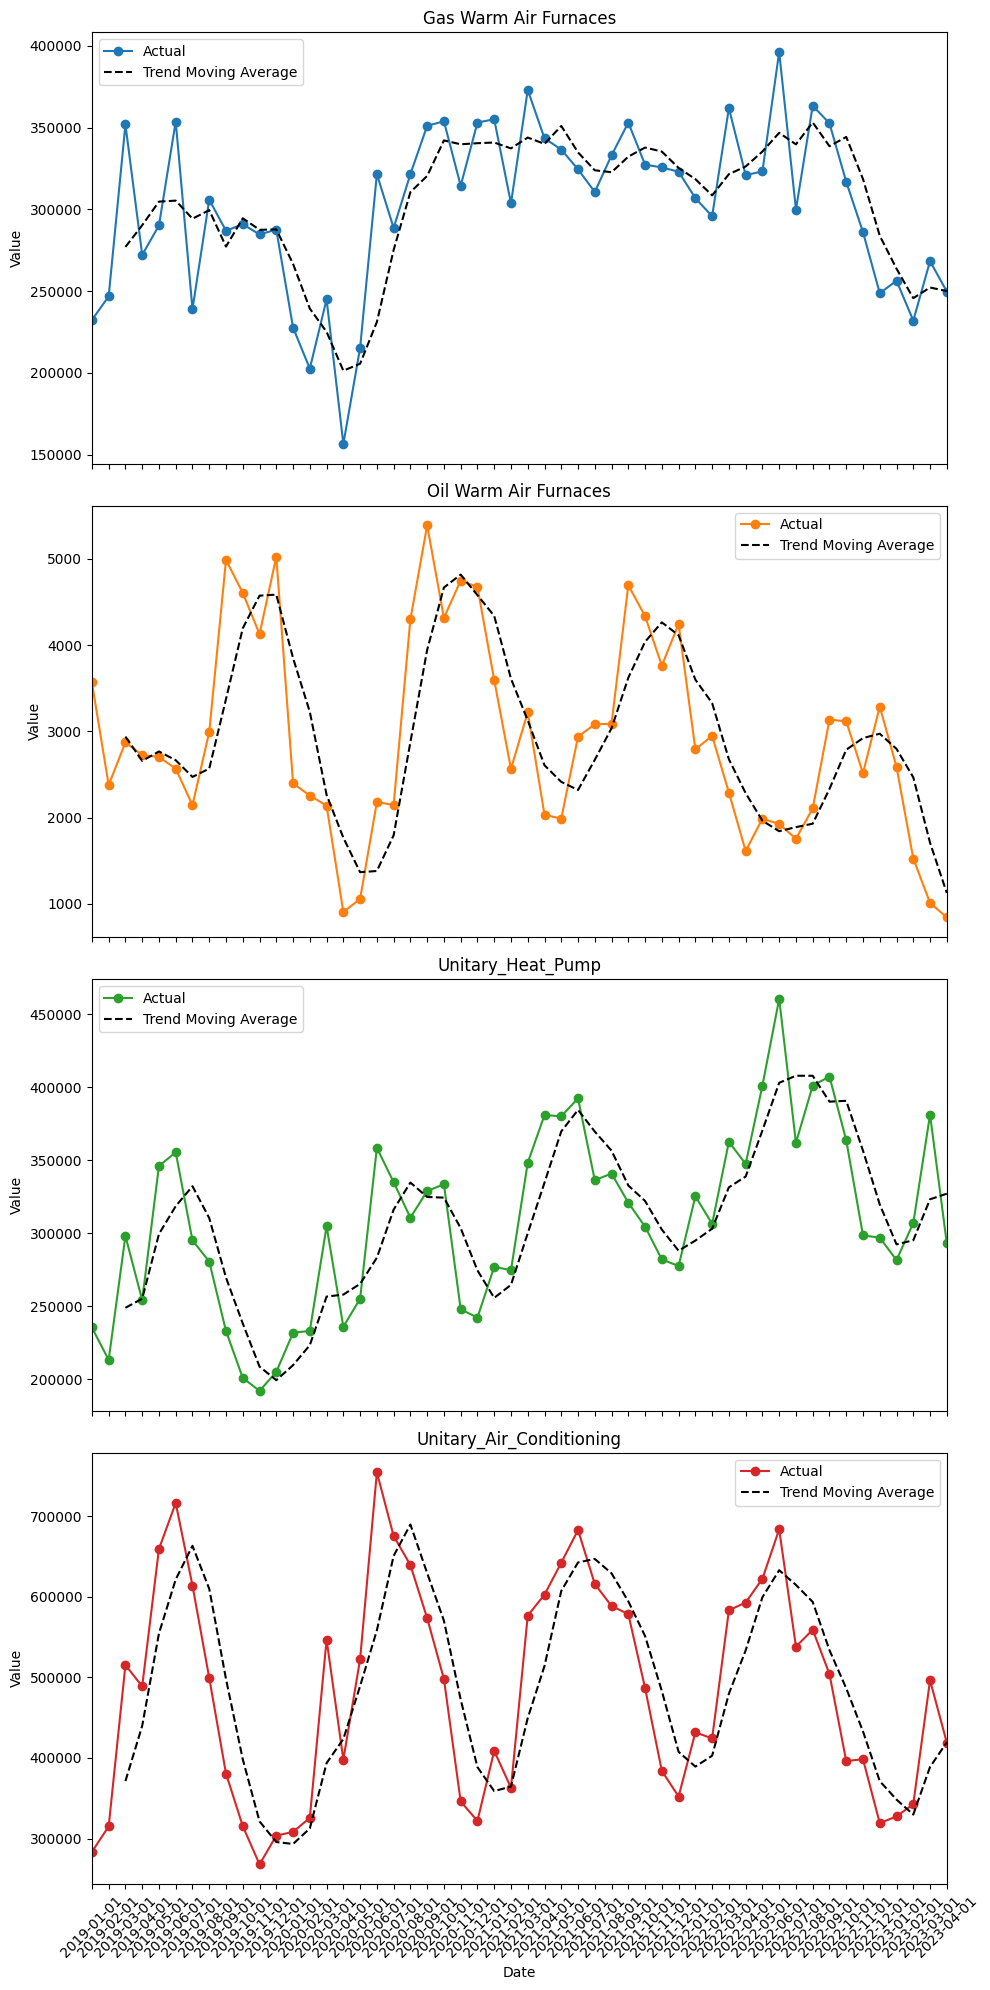

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filepath = 'https://raw.githubusercontent.com/JadenFaste/AHRIData/main/AHRI_no_YTD.csv'
df = pd.read_csv(filepath, parse_dates=['Date'])

#  format 'YYYY-MM-DD', let's use that format to parse them
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date', inplace=True)
window_size = 3

# Calculate the moving average for each column of interest
df_ma = df.rolling(window=window_size).mean()
# Create subplots for each category
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 20), sharex=True)

# Plotting each category with its moving average in the same subplot
categories = ['Gas Warm Air Furnaces', 'Oil Warm Air Furnaces', 'Unitary_Heat_Pump', 'Unitary_Air_Conditioning']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

for i, category in enumerate(categories):
    # Plot actual values
    df[category].plot(ax=axes[i], color=colors[i], marker='o', linestyle='-', label='Actual')
    # Plot moving average
    df_ma[category].plot(ax=axes[i], color='black', linestyle='--', label='Trend Moving Average')

    axes[i].set_title(category)
    axes[i].set_ylabel('Value')
    axes[i].legend()

# Set common x-label
axes[-1].set_xlabel('Date')

# Rotate and format the date labels
plt.setp(axes, xticks=df.index, xticklabels=df.index.strftime('%Y-%m-%d'))
plt.xticks(rotation=45)

# Adjust layout to fit everything
plt.tight_layout()

plt.show()